### k nearest neighbors example
Chronic kidney disease data

In [4]:
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)
from IPython.display import Image
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [5]:
url = "https://raw.githubusercontent.com/vamshikrishnajr/chronic-kidney-disease-diagnosis/master/kidney_disease.csv"
ckd_db = pd.read_csv(url)
ckd_db.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
ckd_db

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [6]:
ckd_db['Class'] = np.where(ckd_db['classification'] == "ckd", 1, 0)
ckd = Table().from_df(ckd_db)
ckd

id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,Class
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd,1
9,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd,1
11,63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,ckd,1
14,68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd,1
20,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd,1
22,48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,ckd,1
27,69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,ckd,1
48,73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,ckd,1
58,73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,ckd,1
71,46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,ckd,1


In [7]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

In [8]:
ckd_s = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('hemo')),
    'Glucose', standard_units(ckd.column('bgr')),
    'White Blood Cell Count', standard_units(ckd.column('wc')),
    'Class', (ckd.column('Class'))
)

In [9]:
ckd_s.stats()

statistic,Hemoglobin,Glucose,White Blood Cell Count,Class
min,-3.68503,-0.947597,-1.50016,0
max,1.43145,5.54049,5.75047,1
median,0.195839,-0.244721,-0.216861,0
sum,3.24185e-14,-1.5413e-14,1.4766e-14,43


In [10]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd_s = ckd_s.join('Class', color_table)

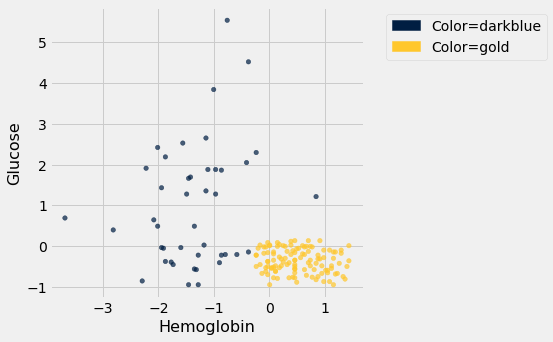

In [11]:
ckd_s.scatter('Hemoglobin', 'Glucose', group='Color')

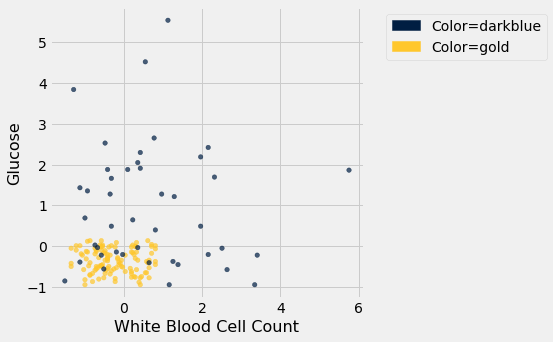

In [12]:
ckd_s.scatter('White Blood Cell Count', 'Glucose', group='Color')

In [13]:
train, test = ckd_s.split(int(ckd_s.num_rows*0.8))
print(train.num_rows, 'training and', test.num_rows, 'test instances.')

126 training and 32 test instances.


In [14]:
def distance(point1, point2):
    """Returns the Euclidean distance between point1 and point2.
    
    Each argument is an array containing the coordinates of a point."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [15]:
def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2)) # Need to convert rows into arrays

In [16]:
test_point_row = test.drop("Class","Color").row(10)
train_point_row = train.drop("Class","Color").row(0)

In [17]:
test_point_row

Row(Hemoglobin=0.8397496002610102, Glucose=1.215099137387819, White Blood Cell Count=1.291013887679196)

In [18]:
row_distance(test_point_row,train_point_row)

2.4300894900810004

In [19]:
def distances(training, example, output):
    """Compute the distance from example for each row in training."""
    dists = []
    attributes = training.drop(output)
    for row in attributes.rows:
        dists.append(row_distance(row, example))
    return training.with_column('Distance', dists)

def closest(training, example, k, output):
    """Return a table of the k closest neighbors to example."""
    return distances(training, example, output).sort('Distance').take(np.arange(k))

In [29]:
cl_knn = closest(train.drop("Color"), test.drop("Class","Color").row(31), 10, "Class")
cl_knn

Class,Hemoglobin,Glucose,White Blood Cell Count,Distance
1,-0.865744,-0.221549,-0.569768,0.597547
1,-1.59667,-0.0361753,-0.666015,0.600796
1,-1.179,0.025616,-0.73018,0.652159
1,-0.587296,-0.206101,-0.0243664,0.971685
1,-0.37846,-0.14431,-0.184779,1.10755
1,-1.94473,-0.0361753,0.360623,1.17317
0,-0.239236,-0.221549,-0.345191,1.17548
0,-0.239236,-0.49961,-0.0564489,1.20253
0,-0.134818,-0.669536,-0.473521,1.22342
1,-0.90055,-0.406923,0.649365,1.25002


### We can use most frequent value for the class as the prediction (like majority)

In [30]:
print("Most frequent value in the above array:")
print(np.bincount(cl_knn.column("Class")).argmax())

Most frequent value in the above array:
1


### Prediction
Now lets predict across all test rows and get a % accuracy

In [42]:
correct = 0
k = 20
for i, row in enumerate(test.drop("Color").rows):
    #print(i,row)
    cl_knn = closest(train.drop("Color"), test.drop("Class","Color").row(i), k, "Class")
    print(i," Prediction: ",np.bincount(cl_knn.column("Class")).argmax()," Actual: ",test.column("Class").take(i))
    correct += (np.bincount(cl_knn.column("Class")).argmax()==test.column("Class").take(i))
print("% Correct: ",correct/(i+1)*100)

0  Prediction:  0  Actual:  0
1  Prediction:  0  Actual:  0
2  Prediction:  1  Actual:  1
3  Prediction:  0  Actual:  0
4  Prediction:  0  Actual:  0
5  Prediction:  0  Actual:  0
6  Prediction:  0  Actual:  0
7  Prediction:  0  Actual:  1
8  Prediction:  0  Actual:  0
9  Prediction:  0  Actual:  0
10  Prediction:  0  Actual:  1
11  Prediction:  1  Actual:  1
12  Prediction:  0  Actual:  0
13  Prediction:  0  Actual:  0
14  Prediction:  0  Actual:  0
15  Prediction:  0  Actual:  0
16  Prediction:  0  Actual:  0
17  Prediction:  0  Actual:  0
18  Prediction:  1  Actual:  1
19  Prediction:  0  Actual:  0
20  Prediction:  0  Actual:  0
21  Prediction:  1  Actual:  1
22  Prediction:  1  Actual:  1
23  Prediction:  1  Actual:  1
24  Prediction:  0  Actual:  0
25  Prediction:  0  Actual:  0
26  Prediction:  0  Actual:  0
27  Prediction:  0  Actual:  0
28  Prediction:  0  Actual:  1
29  Prediction:  0  Actual:  0
30  Prediction:  0  Actual:  0
31  Prediction:  0  Actual:  1
% Correct:  87.5
